<a href="https://colab.research.google.com/github/Jaypardeshii/EDA-Hotel-Booking-Analysis/blob/main/Jay_Pardeshi_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing library 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Define the path where data is kept
file_path = '/content/drive/MyDrive/Alma/Hotel Bookings.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head() # taking look to data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**First of all we will try to understand the meaning of all columns of the dataframe. \ For this we will see the unique values attained by each column whose meaning we are unable to understand.**

In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['is_canceled'].unique()

array([0, 1])

In [ ]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

# **Cleaning data**
While cleaning data we will perform following steps: \ Remove duplicate rows \  Handling missing values. \ Convert columns to appropriate datatypes. \ Adding important columns



In [ ]:
#creating copy of dataframe 
df_copy = df.copy(deep = True)

In [ ]:
# Removing duplicate rows if any
df_copy[df_copy.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows

(31994, 32)

In [ ]:
df_copy.drop_duplicates(inplace = True)   # Droping duplicate values 
df_copy.shape

(87396, 32)

In [ ]:
# cheking null values 
df.isna().sum(axis = 0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### **As we can see agent, company and country are having most null values, we'll check what's in them**

In [ ]:
# Cheking content in agent column
agent_list = df['agent'].tolist()
list(agent_list)

In [ ]:
# Cheking content in company column
company_list = df['company'].tolist()
list(company_list)

In [ ]:
# Cheking content in country column
country_list = df['country'].tolist()
list(country_list)

### **We know what's in the column. So, now we can perform proper cleansing of data.**

In [ ]:
# Filtering and handling null values 
df_copy['children'].fillna(0, inplace = True)
df_copy['country'].fillna('Others', inplace = True)
df_copy['agent'].fillna(0, inplace = True)
df_copy.drop(labels = ['previous_bookings_not_canceled','company'], axis=1, inplace = True)

In [ ]:
# checking if their any null values in df
df_copy.isnull().sum()

## **Converting columns to appropriate datatypes.**

In [ ]:
# Converting datatype from float to int.
df_copy[['children', 'agent']] = df_copy[['children', 'agent']].astype('int64')

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
df_copy['reservation_status_date'] = pd.to_datetime(df_copy['reservation_status_date'], format = '%Y-%m-%d')

## **Adding important columns.**

In [ ]:
# Adding total staying days in hotels
df_copy['total_stay'] = df_copy['stays_in_weekend_nights']+df_copy['stays_in_week_nights']

# Adding total people num as column.
df_copy['total_people'] = df_copy['adults']+df_copy['children']+df_copy['babies']

## **Correlation Analysis**

In [ ]:
correlation = df_copy.corr()
correlation

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,total_people
is_canceled,1.000000,0.184806,0.088030,0.001443,0.005328,0.060191,0.082928,0.081816,0.067369,-0.020543,-0.089643,0.051468,-0.093644,-0.000900,0.004464,0.127986,-0.184206,-0.120545,0.084102,0.100257
lead_time,0.184806,1.000000,0.139135,0.101150,0.009866,0.235145,0.310129,0.140493,0.028650,-0.003614,-0.147003,0.005375,0.077028,0.080448,0.132152,0.023564,-0.086541,0.034240,0.318272,0.126736
arrival_date_year,0.088030,0.139135,1.000000,-0.514228,-0.010023,0.005144,0.003645,0.038619,0.041158,-0.023334,0.024343,-0.054212,0.008604,-0.001891,-0.027939,0.176088,-0.039807,0.064268,0.004630,0.050744
arrival_date_week_number,0.001443,0.101150,-0.514228,1.000000,0.093594,0.026868,0.027801,0.024362,0.013450,0.014260,-0.036860,0.007199,0.011902,0.019594,0.013843,0.098279,0.008946,0.046599,0.030693,0.028973
arrival_date_day_of_month,0.005328,0.009866,-0.010023,0.093594,1.000000,-0.017803,-0.028190,-0.001125,0.015821,-0.000393,-0.004178,-0.008538,0.006307,0.006102,0.006588,0.022591,0.009167,-0.001651,-0.027597,0.008136
stays_in_weekend_nights,0.060191,0.235145,0.005144,0.026868,-0.017803,1.000000,0.555552,0.088284,0.028561,0.013668,-0.106948,-0.020636,0.050316,0.158389,-0.031680,0.038972,-0.042920,0.032396,0.786262,0.087979
stays_in_week_nights,0.082928,0.310129,0.003645,0.027801,-0.028190,0.555552,1.000000,0.095577,0.030479,0.016009,-0.113543,-0.018781,0.085044,0.190041,0.001905,0.053298,-0.044303,0.037823,0.950577,0.095166
adults,0.081816,0.140493,0.038619,0.024362,-0.001125,0.088284,0.095577,1.000000,0.023712,0.016640,-0.171714,-0.042097,-0.048061,0.029627,-0.015740,0.248999,0.007802,0.112772,0.103992,0.804715
children,0.067369,0.028650,0.041158,0.013450,0.015821,0.028561,0.030479,0.023712,1.000000,0.017423,-0.045651,-0.019208,0.031313,0.042034,-0.020419,0.326293,0.036332,0.044596,0.033315,0.595109
babies,-0.020543,-0.003614,-0.023334,0.014260,-0.000393,0.013668,0.016009,0.016640,0.017423,1.000000,-0.012977,-0.005395,0.081035,0.028949,-0.006840,0.023446,0.030885,0.094820,0.017000,0.166135


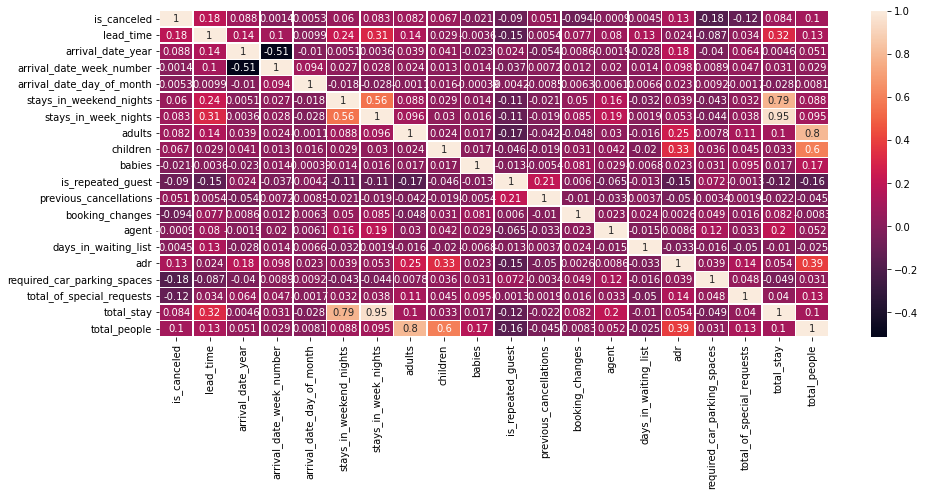

In [ ]:
# correlational heatmap 
plt.figure(figsize=(15,6))
sns.heatmap(correlation, annot = True, linewidths = 0.5)

## **Analysing and visualisation of the dataset**

### **Hotel wise Analysis**

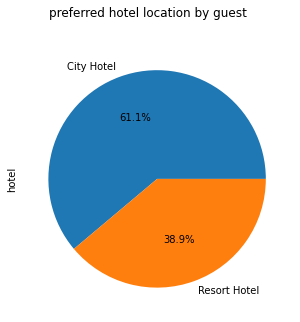

In [ ]:
# preferred hotel location by guest

htl_loc = df_copy['hotel'].value_counts()
htl_dig = htl_loc.plot(kind = 'pie', subplots = True, figsize=(10,5), autopct='%1.1f%%', title = 'preferred hotel location by guest')

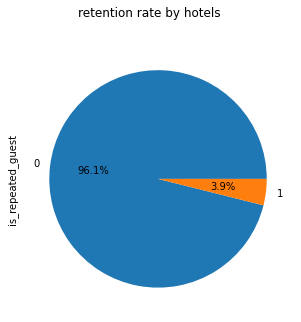

In [ ]:
# retention rate by hotels

reten_guest = df_copy.groupby(['is_repeated_guest'])['is_repeated_guest'].count()
reten_dig = reten_guest.plot(kind = 'pie', subplots = True, figsize=(10,5), autopct='%1.1f%%', title = 'retention rate by hotels')

In [ ]:
# Hotel Cancelation Rate

# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df_copy[df_copy['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
d1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df_copy.groupby('hotel')
total_booking = grouped_by_hotel.size()
d2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
d3 = pd.concat([d1,d2], axis = 1)

# cancel percentage 
d3['cancel_%'] = round((d3['total_cancelled_bookings']/d3['total_bookings'])*100,2)
d3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16049,53428,30.04
Resort Hotel,7976,33968,23.48


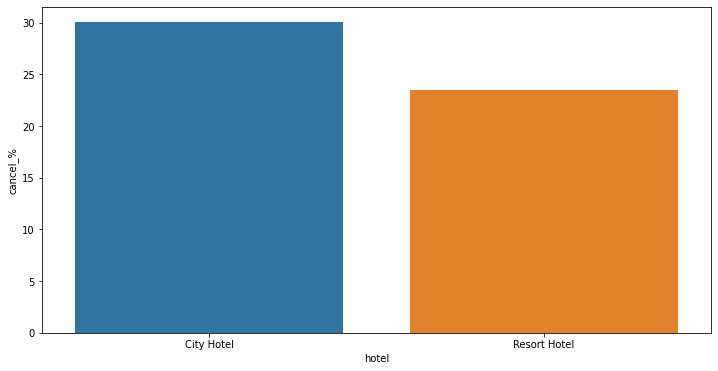

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = d3.index, y = d3['cancel_%'])
plt.show()

### **Distribution Channel wise Analysis**

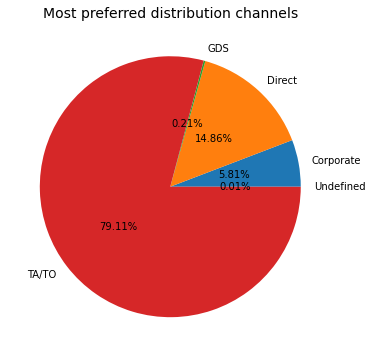

In [ ]:
# most preferred channel for booking hotels

grup_by_dc = df_copy.groupby(['distribution_channel'])
dc1 = pd.DataFrame(round((grup_by_dc.size()/df_copy.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize=(12,6))
data = dc1['Booking_%']
labels = dc1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%",  labels=labels, pctdistance=0.5)
plt.title("Most preferred distribution channels", fontsize=14);

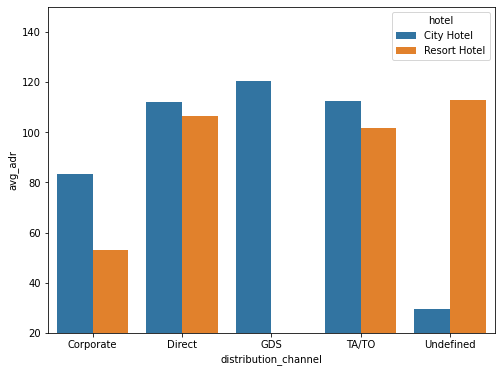

In [ ]:
# distribution channel with better revenue generating deals for hotels

group_by_dc_hotel = df_copy.groupby(['distribution_channel', 'hotel'])
d4 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (8,6))
sns.barplot(x = d4['distribution_channel'], y = d4['avg_adr'], hue = d4['hotel'])
plt.ylim(20,150)
plt.show()

GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue

### **Time wise analysis**

Text(0, 0.5, 'Total number of guest')

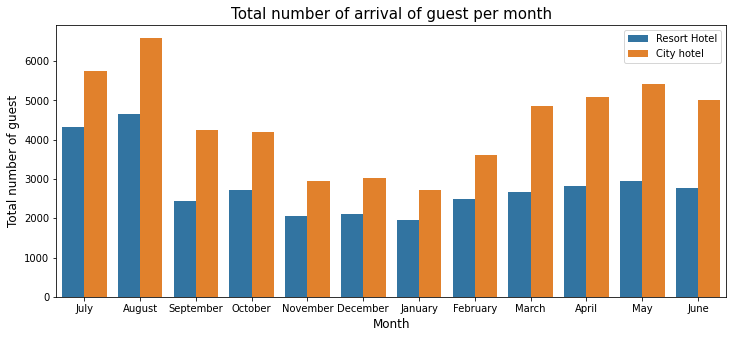

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month', hue='hotel', data=df_copy)
plt.legend(['Resort Hotel', 'City hotel'])
plt.title('Total number of arrival of guest per month', fontsize = 15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total number of guest',fontsize=12)

Most number of guest comes in month of August.


### **which month results in high revenue**

In [ ]:
# Confirm booking data 
data_resort = df_copy[(df_copy['hotel'] == 'Resort Hotel') & (df_copy['is_canceled'] == 0)]
data_city = df_copy[(df_copy['hotel'] == 'City Hotel') & (df_copy['is_canceled'] == 0)]

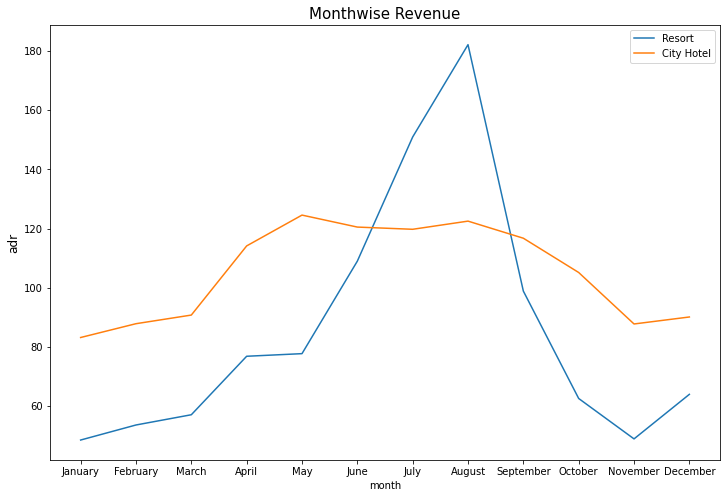

In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=months, ordered=True)
final_hotel = final_hotel.sort_values('month').reset_index()

sns.lineplot(data=final_hotel, x='month', y='price_for_resort')
sns.lineplot(data=final_hotel, x='month', y='price_for_city_hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('adr',fontsize = 12)
plt.title('Monthwise Revenue',fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(12,8)


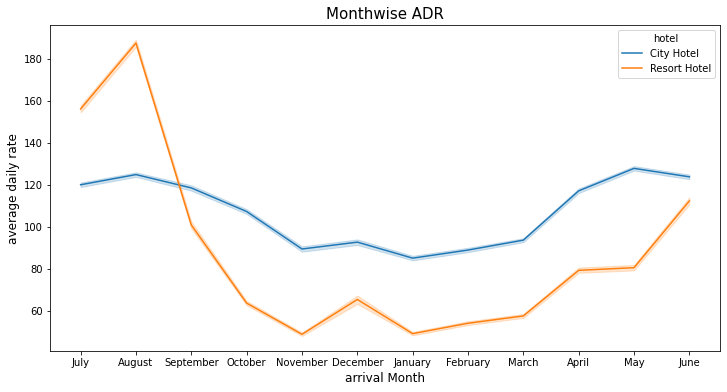

In [ ]:
# average daily rate monthwise 

plt.figure(figsize=(12,6))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=df_copy,
             hue_order = ["City Hotel", "Resort Hotel"])

plt.title("Monthwise ADR",fontsize = 15)
plt.xlabel("arrival Month",fontsize = 12)
plt.ylabel("average daily rate",fontsize = 12)
plt.show()

### **How does length of stay affects the adr**

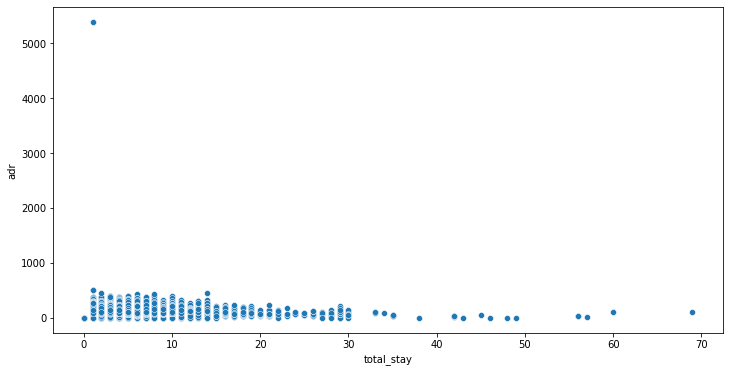

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df_copy)
plt.show()

In [ ]:
df_copy.drop(df_copy[df_copy['adr'] > 5000].index, inplace = True)   # there is an outlier in adr, so we removed that for better scatter plot

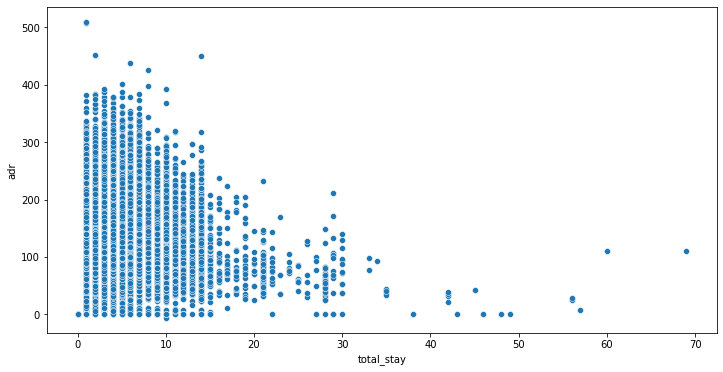

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df_copy)
plt.show()

From this we can see that as the length of stay increases adr decreases.

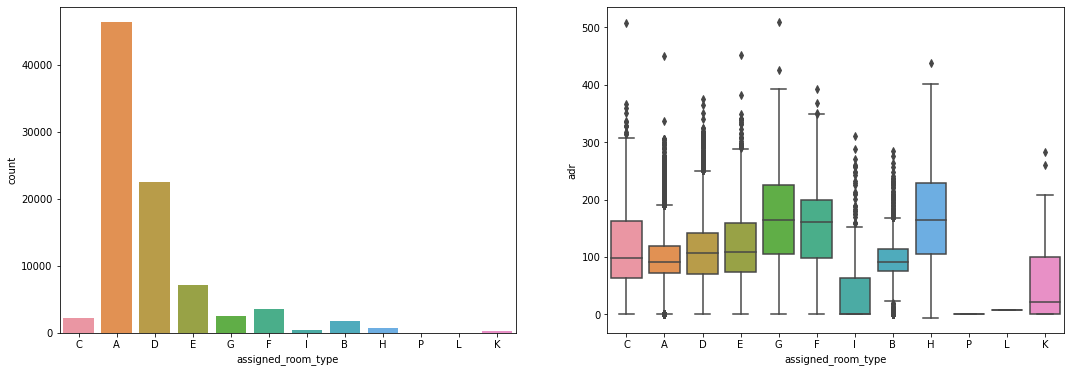

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

grp_by_room = df_copy.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df_copy['assigned_room_type'])                      # plotting in demand room
sns.boxplot(ax = axes[1], x = df_copy['assigned_room_type'], y = df_copy['adr'])    # pl0tting high adr genrating room
plt.show()

We can see that 'A' type room is most in demand but on contrary room type 'H',  'G' and 'F' are most adr genrating rooms respectively 

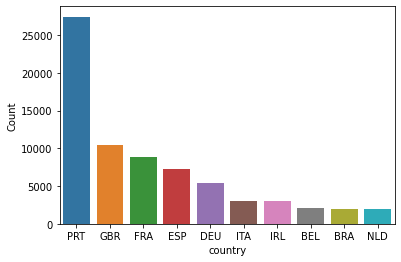

In [ ]:
# Visitors from country

grouped_by_country = df_copy.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

Most guest are from Portugal and other Europian contries.

